In [3]:
import urllib
response = urllib.request.urlopen('http://deeplearning.net/tutorial/code/utils.py')
content = response.read()
target = open('utils.py', 'wb')
target.write(content)
target.close()

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image
from utils import tile_raster_images
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\AkhouriAditya\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
vb =tf.placeholder('float',784)
hb =tf.placeholder('float',500)
W =tf.placeholder('float',[784,500])

In [8]:
X=tf.placeholder('float',[None,784])
_h0=tf.nn.sigmoid(tf.matmul(X,W)+hb)
h0=tf.nn.relu(tf.sign(_h0-tf.random_uniform(tf.shape(_h0))))

In [11]:
with  tf.Session() as sess:
    a= tf.constant([0.7, 0.1, 0.8, 0.2])
    print (sess.run(a))
    b=sess.run(tf.random_uniform(tf.shape(a)))
    print (b)
    print (sess.run(a-b))
    print (sess.run(tf.sign( a - b)))
    print (sess.run(tf.nn.relu(tf.sign( a - b))))

[0.7 0.1 0.8 0.2]
[0.60483205 0.87715244 0.8276285  0.3177966 ]
[ 0.09516793 -0.7771524  -0.02762848 -0.11779658]
[ 1. -1. -1. -1.]
[1. 0. 0. 0.]


In [12]:
_v1=tf.nn.sigmoid(tf.matmul(h0,tf.transpose(W))+vb)
v1=tf.nn.relu(tf.sign(_v1-tf.random_uniform(tf.shape(_v1))))
h1=tf.nn.sigmoid(tf.matmul(v1,W)+hb)

In [13]:
alpha=1.0
w_pos_grad=tf.matmul(tf.transpose(X),h0)
w_neg_grad=tf.matmul(tf.transpose(v1),h1)
CD = (w_pos_grad-w_neg_grad)/tf.to_float(tf.shape(X)[0])
update_w=W+alpha*CD
update_vb=vb+alpha*tf.reduce_mean(X-v1,0)
update_hb=hb+alpha*tf.reduce_mean(h0-h1,0)

In [14]:
err = tf.reduce_mean(tf.square(X - v1))

In [15]:
cur_w = np.zeros([784, 500], np.float32)
cur_vb = np.zeros([784], np.float32)
cur_hb = np.zeros([500], np.float32)
prv_w = np.zeros([784, 500], np.float32)
prv_vb = np.zeros([784], np.float32)
prv_hb = np.zeros([500], np.float32)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [16]:
sess.run(err, feed_dict={X: trX, W: prv_w, vb: prv_vb, hb: prv_hb})

0.4812461

Epoch: 0 reconstruction error: 0.064296
Epoch: 1 reconstruction error: 0.055371
Epoch: 2 reconstruction error: 0.051024
Epoch: 3 reconstruction error: 0.048497
Epoch: 4 reconstruction error: 0.047007


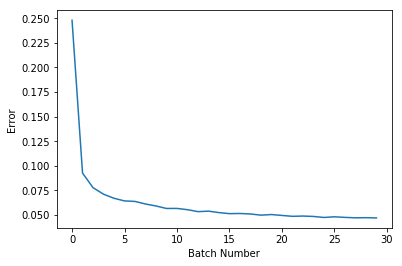

In [18]:
#Parameters
epochs = 5
batchsize = 100
weights = []
errors = []

for epoch in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={ X: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={  X: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={ X: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
        if start % 10000 == 0:
            errors.append(sess.run(err, feed_dict={X: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
            weights.append(cur_w)
    print ('Epoch: %d' % epoch,'reconstruction error: %f' % errors[-1])
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

In [19]:
uw = weights[-1].T
print (uw) # a weight matrix of shape (500,784)

[[-0.25987694 -0.29354978 -0.23252495 ... -0.29214412 -0.26503265
  -0.27129805]
 [-0.30239367 -0.33995166 -0.27471364 ... -0.353151   -0.32608795
  -0.34083554]
 [-0.25000295 -0.28500858 -0.23010798 ... -0.29000732 -0.26501557
  -0.27004793]
 ...
 [-0.25001487 -0.2851529  -0.23003747 ... -0.29000983 -0.26503456
  -0.2726938 ]
 [-0.25000247 -0.28500402 -0.2300258  ... -0.2900165  -0.26500994
  -0.27001667]
 [-0.25005203 -0.28512675 -0.23397096 ... -0.2963899  -0.27507523
  -0.27030137]]


In [ ]:
tile_raster_images(X=cur_w.T, img_shape=(28, 28), tile_shape=(25, 20), tile_spacing=(1, 1))
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(X=cur_w.T, img_shape=(28, 28) ,tile_shape=(25, 20), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')